<IPython.core.display.Javascript object>


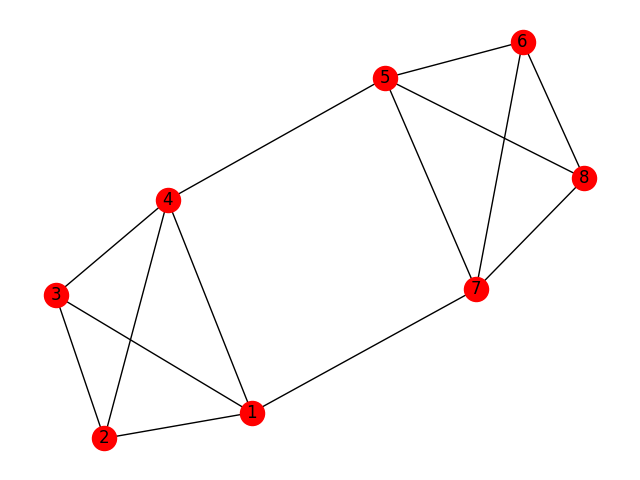

Iterations required to have a low chance of failure:  133
1 [2, 3, 4, 7]
2 [1, 3, 4]
3 [1, 2, 4]
4 [1, 2, 3, 5]
7 [1, 5, 6, 8]
5 [4, 6, 7, 8]
6 [5, 7, 8]
8 [5, 6, 7]
Cuts
{'[(4, 5), (1, 7)]': [2, [1, 2, 3, 4], [5, 6, 7, 8]]}


In [462]:
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math
import random
import pprint
pp = pprint.PrettyPrinter(indent=4)

def minCutKarger(G):
    # Create a local copy of the undirected graph
    G = G.copy()

    # Re-seed our random number generator, to ensure a different contraction.
    random.seed()
    while G.number_of_nodes() > 2:
        # Pick an edge at random
        E = nx.edges(G)
        idx = random.randrange(0, len(E), 1)
        e =E[idx]

#         # Pick a node at random, and then a neighbor at random
#         u_idx = random.randrange(0, G.number_of_nodes(), 1)
#         u = G.nodes()[u_idx]
#         u_neighbors = [n for n in nx.all_neighbors(G, u)]        
#         v_idx = random.randrange(0, len(u_neighbors), 1)
#         v = u_neighbors[v_idx]
#         e = (u,v)

        # Contract the two vertices
        v_members = G.node[e[1]]['members']
        G = nx.contracted_nodes(G, e[0], e[1], self_loops=False)
        G.node[e[0]]['members'] = list(set(G.node[e[0]]['members'])|set([e[0],e[1]]))
        G.node[e[0]]['members'] = list(set(G.node[e[0]]['members'])|set(v_members))
    return G

G = nx.Graph()
for line in open("04_testcase_1.txt"):
    row = line.strip().split("\t")
    sample = [int(x) for x in row]
    v = sample[0]
    for y in sample[1:]:
        G.add_edge(v, y)
    G.node[v] = {'members': [v]}

nx.draw(G, with_labels=True)

n = nx.number_of_nodes(G)
iterations_needed = int((n**2)*math.log(n))
print("Iterations required to have a low chance of failure: ", iterations_needed)

for node in G.nodes():
    print(node, G.neighbors(node))

min_cut_size = nx.number_of_edges(G)
cuts = {}

for i in range(1,iterations_needed):
    cut = minCutKarger(G)
    cut_size = 0
    u_members = cut.node[cut.nodes()[0]]['members']
    v_members = cut.node[cut.nodes()[1]]['members']
    min_cut_edges = []
    for u_member in u_members:
        for neighbor in G.neighbors(u_member):
            if neighbor in v_members:
                u = u_member
                v = neighbor
                e = (min(u, v), max(u, v))
                min_cut_edges = list(set(min_cut_edges)|set([e]))
                cut_size += 1
    if cut_size < min_cut_size:
        cuts.clear()
        min_cut_size = cut_size
    if cut_size == min_cut_size:
        cuts[str(min_cut_edges)] = [cut_size, u_members, v_members]

print("Cuts")
pp.pprint(cuts)
